# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Setting URL for the API call
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

##  Quick Ref regarding exercise parameters here:
#  Your objective is to build a series of scatter plots to showcase the following relationships:
#     Temperature (F) vs. Latitude
#     Humidity (%) vs. Latitude
#     Cloudiness (%) vs. Latitude
#     Wind Speed (mph) vs. Latitude

#  Creating empty lists to hold our retrieved data from the API.  Also including lists for data,
#  latitude, longitude, and country based on example provided.

high_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
date = []
country = []
lat = []
lng = []

#  Utilize a For Loop with the new 'try' and 'except' method / parameter Hobert mentioned last class
#  Exercise specified to provide a log of each city and it's retrieval number, need to implement 
#  a counter as part of the For loop below.

record = 1

#  Make the log file user friendly with descriptive statements
print(f"Please wait, Data Retrieval Initiated!")
print(f"=======================================")

#  Our loop begins.  Exercise utilized the random function from the Numpy module to select random 
#  latitudes & longitudes, and then utilized Citipy's nearest city function to build our city list.
#  So now we'll loop through our new randomized city list to pull data from the OpenWeather API.

for city in cities:  
    
    try: 
        
        # Primary Data Retrieval
        #response = requests.get(f"{url}&q={city}").json() 
        response = requests.get(f"{query_url}{city}").json()
                
        # add to city
        city_name.append(response["name"])
        # add to cloudiness
        cloudiness.append(response["clouds"]["all"])
        # add to country
        country.append(response["sys"]["country"])
        # add to date
        date.append(response["dt"])
        # add to humidity
        humidity.append(response["main"]["humidity"])
        # add to max temp
        high_temp.append(response["main"]["temp_max"])
        # add to latitude
        lat.append(response["coord"]["lat"])
        # add to longitude
        lng.append(response["coord"]["lon"])
        # add to windspeed
        wind_speed.append(response["wind"]["speed"])
        
        #  UX feedback regarding what's currently happening in our loop.  
        record_city_id = response["name"]
        print(f"Processing Record {record} | {record_city_id}")
            
        # Increase counter by one 
        record = record + 1
        
        # API key was revoked due to my troubleshooting testing (or just bad initial code),
        # using this sleep method to avoid pulling more than 60 queries a minute (I inlcluded
        # a extra half-second as margin of error)
        time.sleep(1.5)
        
    # If no record found "skip" to next call
    except:
        print("== City not found. Skipping to next entry ==")
    continue
# query_url

Please wait, Data Retrieval Initiated!
Processing Record 1 | Barrow
Processing Record 2 | Great Falls
Processing Record 3 | Narsaq
Processing Record 4 | Atuona
Processing Record 5 | Castro
Processing Record 6 | Alice Springs
Processing Record 7 | East London
Processing Record 8 | Mar del Plata
Processing Record 9 | Dikson
Processing Record 10 | Hobart
Processing Record 11 | Rikitea
Processing Record 12 | Yellowknife
Processing Record 13 | Cape Town
Processing Record 14 | Aktas
Processing Record 15 | Coyhaique
== City not found. Skipping to next entry ==
Processing Record 16 | Punta Arenas
Processing Record 17 | Jamestown
Processing Record 18 | New Norfolk
Processing Record 19 | Thompson
Processing Record 20 | Nikolskoye
Processing Record 21 | Lodwar
Processing Record 22 | Fairbanks
Processing Record 23 | Kushiro
Processing Record 24 | Ushuaia
Processing Record 25 | Kon Tum
Processing Record 26 | Tiksi
Processing Record 27 | Hong Kong
Processing Record 28 | La Unión
Processing Record 29

Processing Record 217 | Mapiripán
Processing Record 218 | Bantou
Processing Record 219 | Buchanan
Processing Record 220 | Ormara
Processing Record 221 | Zletovo
Processing Record 222 | Carnarvon
Processing Record 223 | Ossora
Processing Record 224 | Lachi
Processing Record 225 | Roald
Processing Record 226 | Porbandar
Processing Record 227 | Klyuchi
Processing Record 228 | Rind
Processing Record 229 | Fort Nelson
Processing Record 230 | Grand-Santi
Processing Record 231 | Mildura
Processing Record 232 | Saskylakh
Processing Record 233 | Osypenko
Processing Record 234 | Ust-Nera
Processing Record 235 | Purpe
Processing Record 236 | Flinders
Processing Record 237 | Chaman
Processing Record 238 | Buraidah
Processing Record 239 | Guadalupe y Calvo
Processing Record 240 | Sabang
Processing Record 241 | Darovskoy
Processing Record 242 | Derzhavīnsk
Processing Record 243 | Guider
Processing Record 244 | Buritis
Processing Record 245 | Imbituba
Processing Record 246 | Shingū
Processing Record 

Processing Record 445 | Charters Towers
Processing Record 446 | Port Moresby
Processing Record 447 | Zanesville
Processing Record 448 | Yeppoon
Processing Record 449 | Nikolayevsk-on-Amur
Processing Record 450 | Mnogovershinnyy
Processing Record 451 | Pangoa
Processing Record 452 | Minas
Processing Record 453 | Port Hedland
Processing Record 454 | Yermakovskoye
Processing Record 455 | Hirara
Processing Record 456 | Roebourne
Processing Record 457 | Lensk
Processing Record 458 | Tateyama
Processing Record 459 | Kamenka
Processing Record 460 | Makkah al Mukarramah
Processing Record 461 | Tyret’ Pervaya
Processing Record 462 | Bathsheba
Processing Record 463 | Prince Rupert
Processing Record 464 | Tuatapere
Processing Record 465 | La Providencia
Processing Record 466 | Ecoporanga
Processing Record 467 | Río Gallegos
Processing Record 468 | Brae
== City not found. Skipping to next entry ==
Processing Record 469 | Oyama
Processing Record 470 | Lerici
Processing Record 471 | Kashgar
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#  Taking our various lists and converting them into a dictionary with Key-Value Pairs, which form
#  our column name and data series moving forward.

consolidated_weather_data = {"City": city_name,
                             "Lat": lat,
                             "lng": lng,
                             "Max Temp": high_temp,
                             "Humidity": humidity,
                             "Cloudiness": cloudiness,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date
}

consolidated_weather_df = pd.DataFrame(consolidated_weather_data)
consolidated_weather_df.count()

City          582
Lat           582
lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [21]:
consolidated_weather_df.to_csv("Export_data/consolidated_weather_data.csv")

In [22]:
consolidated_weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,255.15,71,90,4.63,US,1612631204
1,Great Falls,47.5002,-111.3008,255.37,78,90,5.14,US,1612631124
2,Narsaq,60.9167,-46.0500,274.15,25,1,10.80,GL,1612631063
3,Atuona,-9.8000,-139.0333,299.91,77,57,10.02,PF,1612631209
4,Castro,-24.7911,-50.0119,297.74,50,0,3.33,BR,1612631210


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
consolidated_weather_df.describe()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,19.363943,20.843520,283.594570,70.756014,53.932990,3.916289,1.612632e+09
std,33.724826,91.144525,18.774671,21.427272,38.726998,2.757250,2.812793e+02
min,-54.800000,-179.166700,230.930000,7.000000,0.000000,0.190000,1.612631e+09
25%,-9.061225,-61.636450,271.150000,60.000000,16.000000,1.795000,1.612631e+09
50%,22.622500,24.696100,289.260000,77.000000,66.000000,3.125000,1.612632e+09
75%,48.606875,105.598050,298.617500,87.000000,90.000000,5.540000,1.612632e+09
max,78.218600,178.416700,311.250000,100.000000,100.000000,19.030000,1.612632e+09


In [27]:
#  Based on our Describe function we sese no erroneous entries claiming greater than 100% humidity
#  (that's not possible).

In [28]:
#  Get the indices of cities that have humidity over 100%.
#!  TA / Tutor:  Need to ask how we would do this?

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

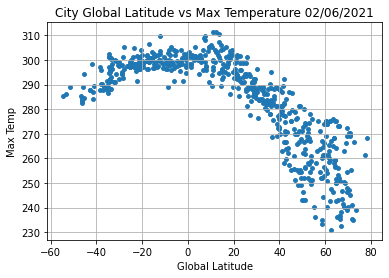

In [31]:
# Creating scatter plot using the matplotlib method

plt.scatter(consolidated_weather_df["Lat"],consolidated_weather_df["Max Temp"], marker="o", s=15)
plt.title("City Global Latitude vs Max Temperature 02/06/2021")
plt.ylabel("Max Temp")
plt.xlabel("Global Latitude")
plt.grid(True)

plt.savefig("Export_data/lat_vs_temp_scatter.png")
plt.show()


## Latitude vs. Humidity Plot

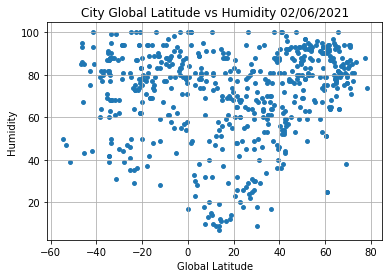

In [32]:
plt.scatter(consolidated_weather_df["Lat"],consolidated_weather_df["Humidity"], marker="o", s=15)
plt.title("City Global Latitude vs Humidity 02/06/2021")
plt.ylabel("Humidity")
plt.xlabel("Global Latitude")
plt.grid(True)

plt.savefig("Export_data/lat_vs_humidity_scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

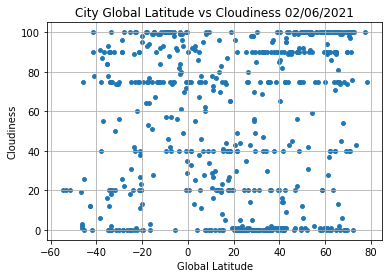

In [33]:
plt.scatter(consolidated_weather_df["Lat"],consolidated_weather_df["Cloudiness"], marker="o", s=15)
plt.title("City Global Latitude vs Cloudiness 02/06/2021")
plt.ylabel("Cloudiness")
plt.xlabel("Global Latitude")
plt.grid(True)

plt.savefig("Export_data/lat_vs_cloud_scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

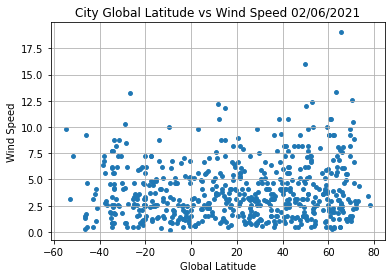

In [34]:
plt.scatter(consolidated_weather_df["Lat"],consolidated_weather_df["Wind Speed"], marker="o", s=15)
plt.title("City Global Latitude vs Wind Speed 02/06/2021")
plt.ylabel("Wind Speed")
plt.xlabel("Global Latitude")
plt.grid(True)

plt.savefig("Export_data/lat_vs_wind_scatter.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


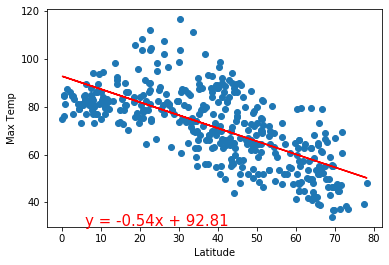

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


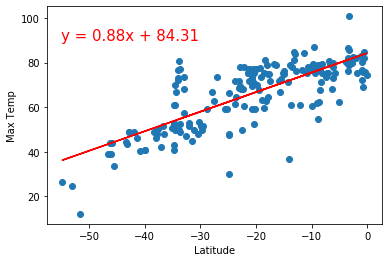

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


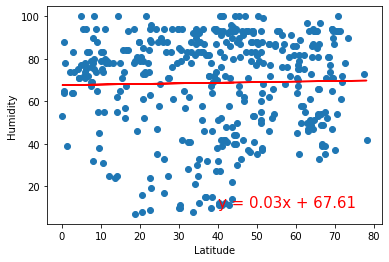

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


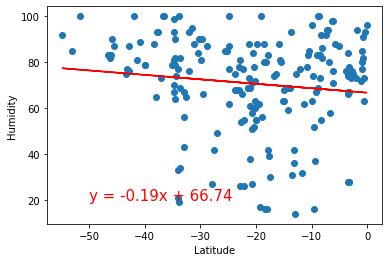

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


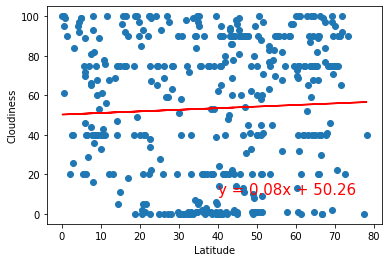

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


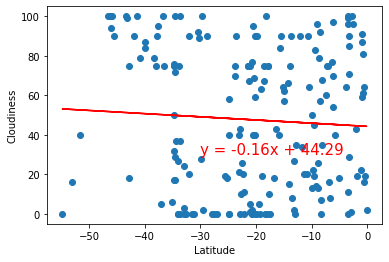

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


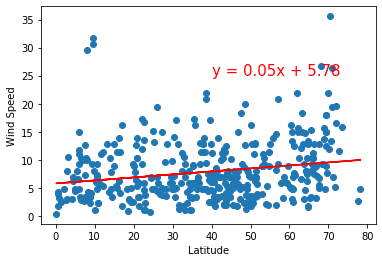

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


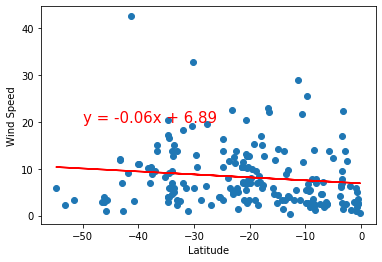